## КМ2

1) Число ${\pi}$ равно длине окружности единичного радиуса, деленной на два. Аппроксимируйте окружность многоугольником с n-сторонами, а длину окружности - длиной сторон многоугольника. Координаты вершины многоугольника:
${x_i}$ = cos(2*${\pi}$ * i/n), ${y_i}$ = sin(2*${\pi}$ * i/n). С помощью NumPy напишите функцию, вычисляющую приближение числа ${\pi}$ без использования циклов.

2) Нарисуйте график погрешности аппроксимации числа ${\pi}$ от n

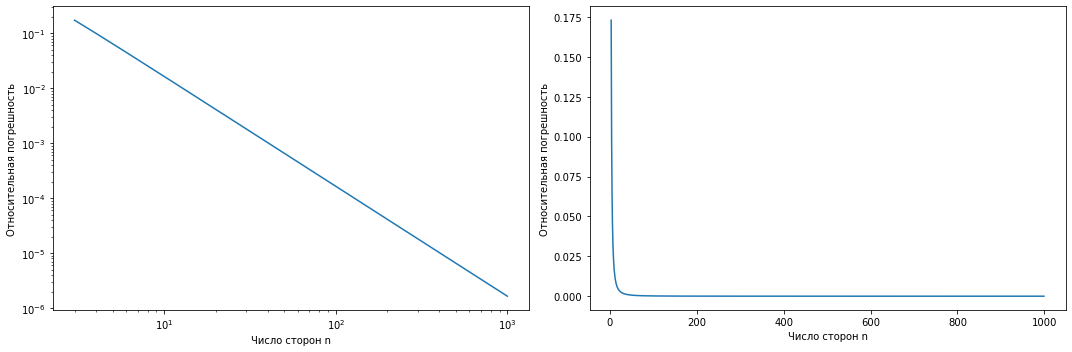

In [3]:
import numpy as np
import matplotlib.pyplot as plt


def get_pi(n):
    i = np.array(range(n))
    x = np.cos(2*np.pi * (i/n)).tolist()
    y = np.sin(2*np.pi * (i/n)).tolist()
    len_x = list(map(lambda a: (x[a] - x[a-1])**2, i[1:]))
    len_x.append((x[-1]-x[0])**2)
    len_y = list(map(lambda a: (y[a] - y[a-1])**2, i[1:]))
    len_y.append((y[-1]-y[0])**2)
    side_lengths = map(lambda a, b: np.sqrt(a+b), len_x, len_y)
    return sum(side_lengths)/2
    

def view_err(func):
    n = range(3, 1000)
    y = [func(i) for i in n]
    y = [(np.pi - i)/np.pi for i in y]
    fig = plt.figure(figsize=(15, 5))
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.loglog(n, y)
    ax1.set_xlabel('Число сторон n')
    ax1.set_ylabel('Относительная погрешность')
    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(n, y)
    ax2.set_xlabel('Число сторон n')
    ax2.set_ylabel('Относительная погрешность')
    plt.tight_layout()
    plt.show()

view_err(get_pi)

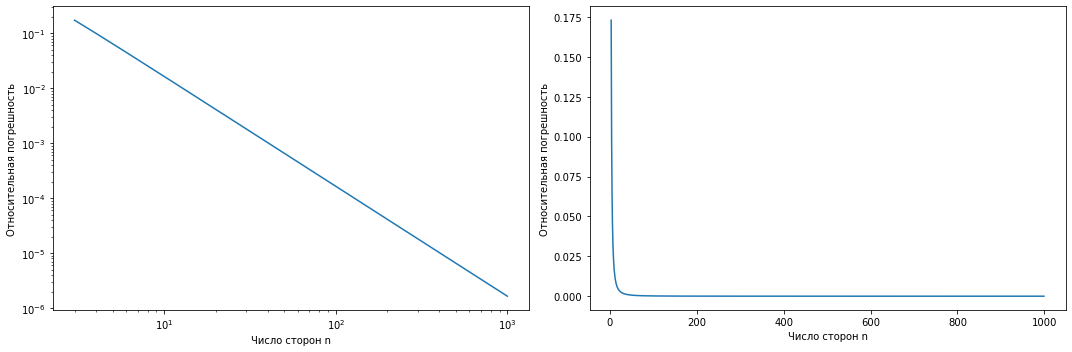

In [72]:
def get_pi_v2(n):
    i = np.array(range(n))
    x = np.cos(2*np.pi * (i/n))
    y = np.sin(2*np.pi * (i/n))
    side_lengths = np.sqrt(((x[i] - x[i-1])**2) + ((y[i] - y[i-1])**2))
    return np.sum(side_lengths)/2


view_err(get_pi_v2)

In [73]:
%timeit get_pi(100)

254 µs ± 4.79 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [75]:
%timeit get_pi_v2(100)

44.4 µs ± 1.09 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [77]:
for i in range(20, 40):
    print(get_pi_v2(i))

3.128689300804617
3.129887589699663
3.1309264420122727
3.131832929213671
3.1326286132812386
3.133330839107606
3.1339536866383995
3.134508681381216
3.13500533089262
3.135451534294311
3.135853898029605
3.1362179816103977
3.1365484905459393
3.136849429038028
3.1371242217522677
3.1373758116201724
3.1376067389156943
3.1378192055938396
3.138015127948628
3.1381961799523106
